# Quicklook

In [24]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_theme(style="darkgrid")

In [25]:
file = "/indian/UAS_project_data/2025_11_03_Arluno/M300/Flight_record/DJIFlightRecord_2025-11-03_[11-46-35].csv"

fr_df = pd.read_csv(file[:-3] + "csv")

In [26]:
# Convert to datetime
fr_df['CUSTOM.dateTime_dt'] = pd.to_datetime(fr_df['CUSTOM.dateTime'], format='ISO8601',utc=True)
fr_df['CUSTOM.dateTime_dt']

0             1970-01-01 00:00:00+00:00
1      2025-11-03 10:46:35.485000+00:00
2      2025-11-03 10:46:35.586000+00:00
3      2025-11-03 10:46:35.688000+00:00
4      2025-11-03 10:46:35.790000+00:00
                     ...               
6062   2025-11-03 10:56:41.601000+00:00
6063   2025-11-03 10:56:41.703000+00:00
6064   2025-11-03 10:56:41.805000+00:00
6065   2025-11-03 10:56:41.907000+00:00
6066   2025-11-03 10:56:41.907000+00:00
Name: CUSTOM.dateTime_dt, Length: 6067, dtype: datetime64[ns, UTC]

/tmp/ipykernel_171690/2071795.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


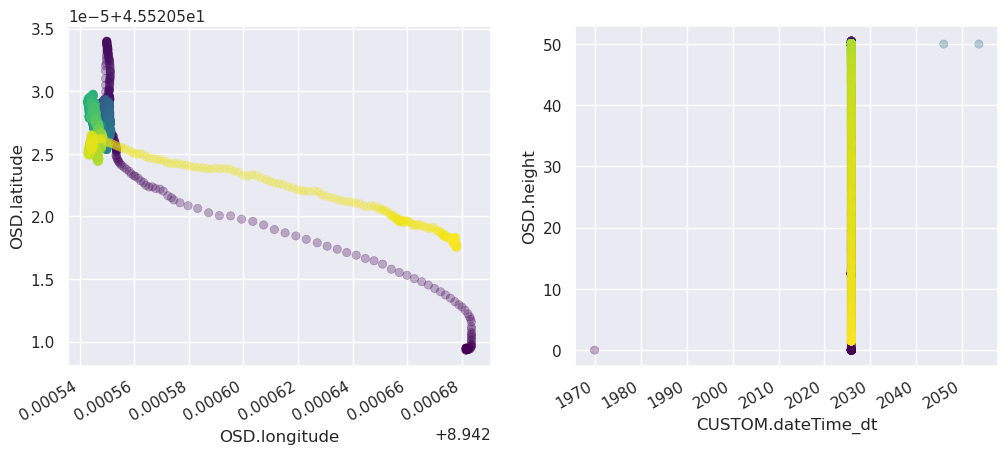

In [27]:

# Plot trajectory
fig,axes=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(
        data=fr_df,
        x='OSD.longitude',
        y='OSD.latitude',
        hue='CUSTOM.dateTime_dt',
        legend=False,
        ax=axes[0],
        edgecolor=None,
        alpha=0.3,
        palette='viridis',
    )

sns.scatterplot(
        data=fr_df,
        x='CUSTOM.dateTime_dt',
        y='OSD.height',
        hue='CUSTOM.dateTime_dt',
        legend=False,
        ax=axes[1],
        edgecolor=None,
        alpha=0.3,
        palette='viridis',
    )

fig.autofmt_xdate(rotation=30, ha='right')

fig.show()

In [28]:
# Filter sampling errors.
median_time = fr_df['CUSTOM.dateTime_dt'].median()
i_to_drop = fr_df.loc[(fr_df['CUSTOM.dateTime_dt'] > median_time+pd.Timedelta(1,'day')) | (fr_df['CUSTOM.dateTime_dt'] < median_time-pd.Timedelta(1,'day'))].index
print(f"Dropping {len(i_to_drop)} rows with datetime errors.")
fr_df.drop(axis=0, index=i_to_drop,inplace=True)
fr_df

Dropping 3 rows with datetime errors.


,CUSTOM.dateTime,OSD.flyTime,OSD.latitude,OSD.longitude,OSD.height,OSD.heightMax,OSD.vpsHeight,OSD.altitude,OSD.xSpeed,OSD.xSpeedMax,...,DETAILS.maxVerticalSpeed,DETAILS.photoNum,DETAILS.videoTime,DETAILS.aircraftName,DETAILS.aircraftSerial,DETAILS.cameraSerial,DETAILS.rcSerial,DETAILS.appPlatform,DETAILS.appVersion,CUSTOM.dateTime_dt
1,2025-11-03T10:46:35.485Z,542.9,45.520509,8.942682,0.0,0.0,0.2,0.000000,0.0,0.0,...,3.8,0,0,M300 RTK,1ZNBJ8300C00M3,NaN,1ZMBJ7800301KX,Android,4.0.64,2025-11-03 10:46:35.485000+00:00
2,2025-11-03T10:46:35.586Z,543.0,45.520509,8.942682,0.0,0.0,0.2,0.000000,0.0,0.0,...,3.8,0,0,M300 RTK,1ZNBJ8300C00M3,NaN,1ZMBJ7800301KX,Android,4.0.64,2025-11-03 10:46:35.586000+00:00
3,2025-11-03T10:46:35.688Z,543.1,45.520509,8.942682,0.0,0.0,0.2,70.123436,0.0,0.0,...,3.8,0,0,M300 RTK,1ZNBJ8300C00M3,NaN,1ZMBJ7800301KX,Android,4.0.64,2025-11-03 10:46:35.688000+00:00
4,2025-11-03T10:46:35.790Z,543.2,45.520509,8.942682,0.0,0.0,0.2,70.123436,0.0,0.0,...,3.8,0,0,M300 RTK,1ZNBJ8300C00M3,NaN,1ZMBJ7800301KX,Android,4.0.64,2025-11-03 10:46:35.790000+00:00
5,2025-11-03T10:46:35.891Z,543.3,45.520509,8.942682,0.0,0.0,0.2,70.123436,0.0,0.0,...,3.8,0,0,M300 RTK,1ZNBJ8300C00M3,NaN,1ZMBJ7800301KX,Android,4.0.64,2025-11-03 10:46:35.891000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6062,2025-11-03T10:56:41.601Z,1149.0,45.520518,8.942677,1.5,50.5,0.2,71.623436,0.0,0.5,...,3.8,0,0,M300 RTK,1ZNBJ8300C00M3,NaN,1ZMBJ7800301KX,Android,4.0.64,2025-11-03 10:56:41.601000+00:00
6063,2025-11-03T10:56:41.703Z,1149.1,45.520518,8.942677,1.5,50.5,0.2,71.623436,0.0,0.5,...,3.8,0,0,M300 RTK,1ZNBJ8300C00M3,NaN,1ZMBJ7800301KX,Android,4.0.64,2025-11-03 10:56:41.703000+00:00
6064,2025-11-03T10:56:41.805Z,1149.2,45.520518,8.942677,1.5,50.5,0.2,71.623436,0.0,0.5,...,3.8,0,0,M300 RTK,1ZNBJ8300C00M3,NaN,1ZMBJ7800301KX,Android,4.0.64,2025-11-03 10:56:41.805000+00:00
6065,2025-11-03T10:56:41.907Z,1149.3,45.520518,8.942677,1.5,50.5,0.2,71.623436,0.0,0.5,...,3.8,0,0,M300 RTK,1ZNBJ8300C00M3,NaN,1ZMBJ7800301KX,Android,4.0.64,2025-11-03 10:56:41.907000+00:00


/tmp/ipykernel_171690/17863551.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


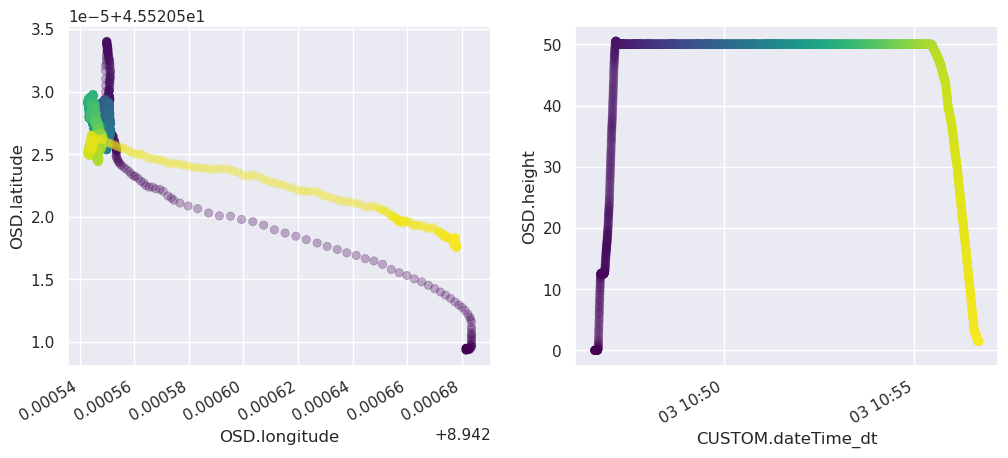

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_theme(style="darkgrid")

# Plot trajectory
fig,axes=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(
        data=fr_df,
        x='OSD.longitude',
        y='OSD.latitude',
        hue='CUSTOM.dateTime_dt',
        legend=False,
        ax=axes[0],
        edgecolor=None,
        alpha=0.3,
        palette='viridis',
    )

sns.scatterplot(
        data=fr_df,
        x='CUSTOM.dateTime_dt',
        y='OSD.height',
        hue='CUSTOM.dateTime_dt',
        legend=False,
        ax=axes[1],
        edgecolor=None,
        alpha=0.3,
        palette='viridis',    
    )

fig.autofmt_xdate(rotation=30, ha='right')

fig.show()

# Multiple flights Quicklook

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[11-34-21].csv


Dropping 3 rows with datetime errors.


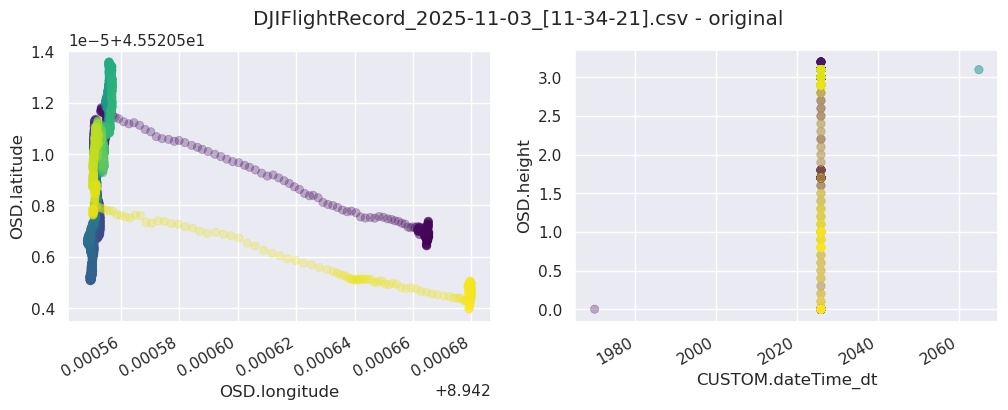

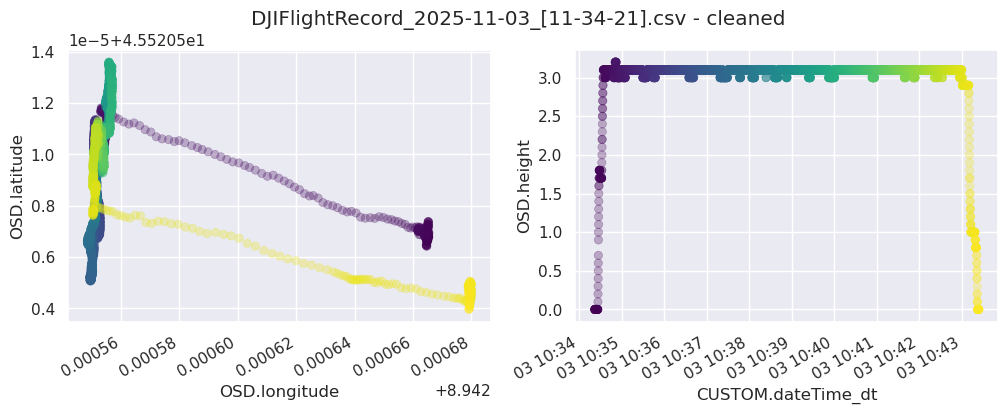

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[12-11-51].csv
Dropping 2 rows with datetime errors.


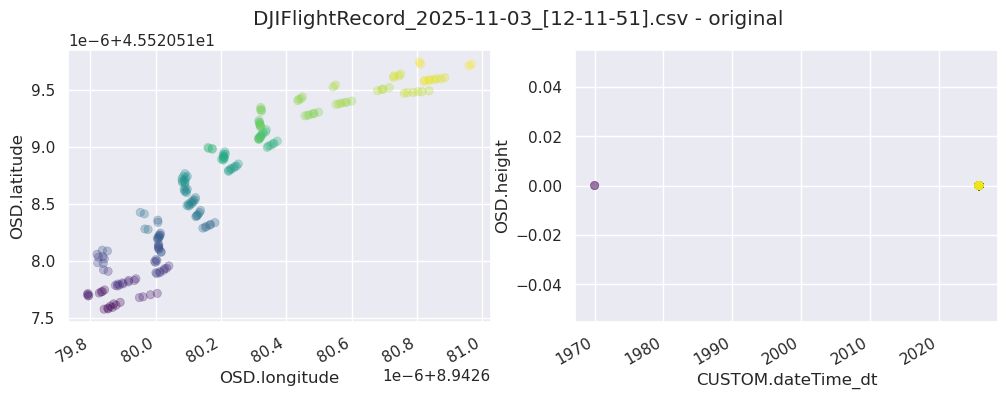

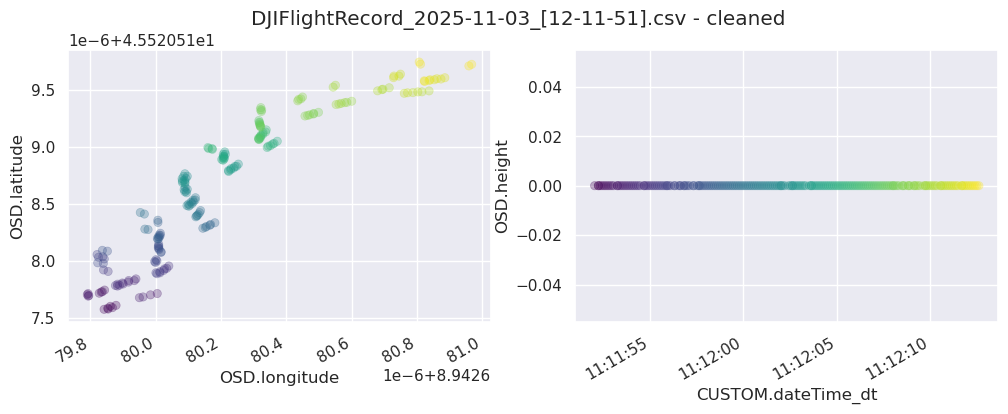

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[15-37-37].csv
Dropping 2 rows with datetime errors.


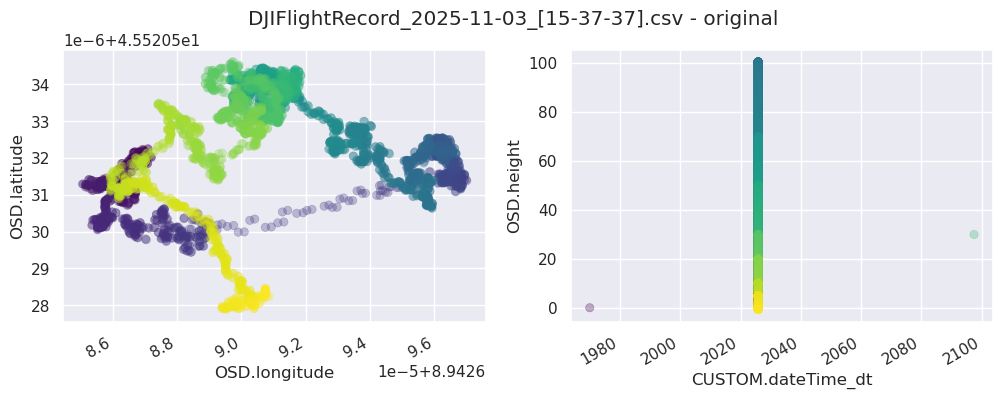

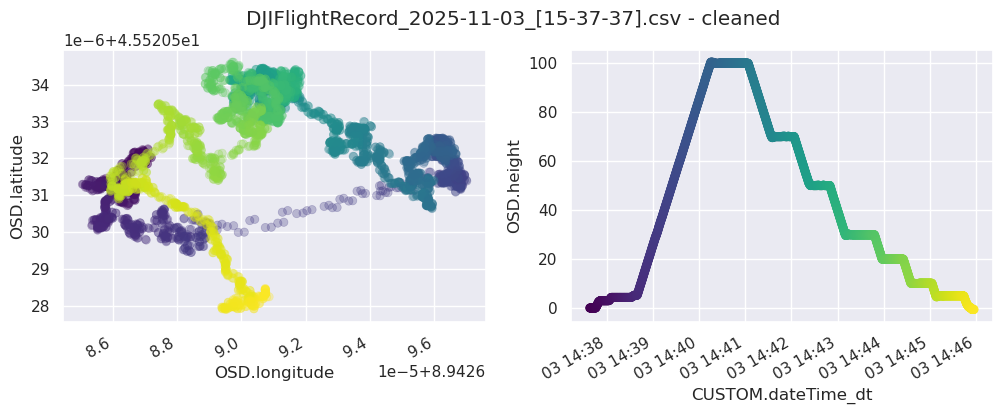

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[15-46-24].csv
Dropping 1 rows with datetime errors.


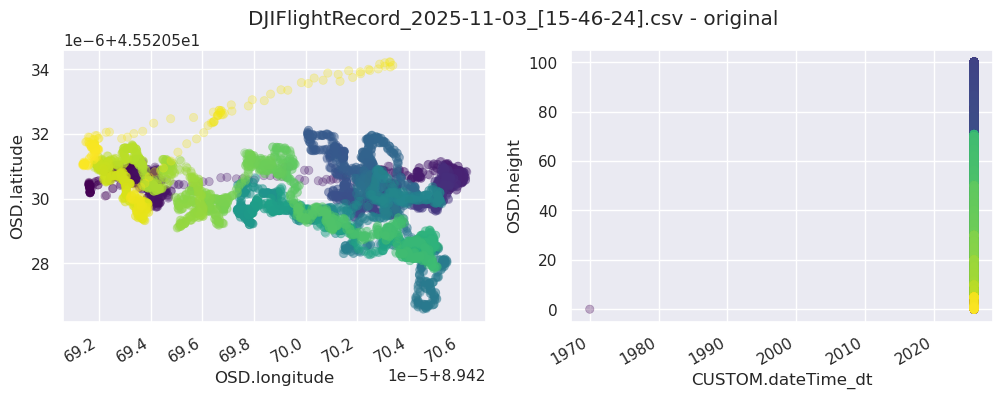

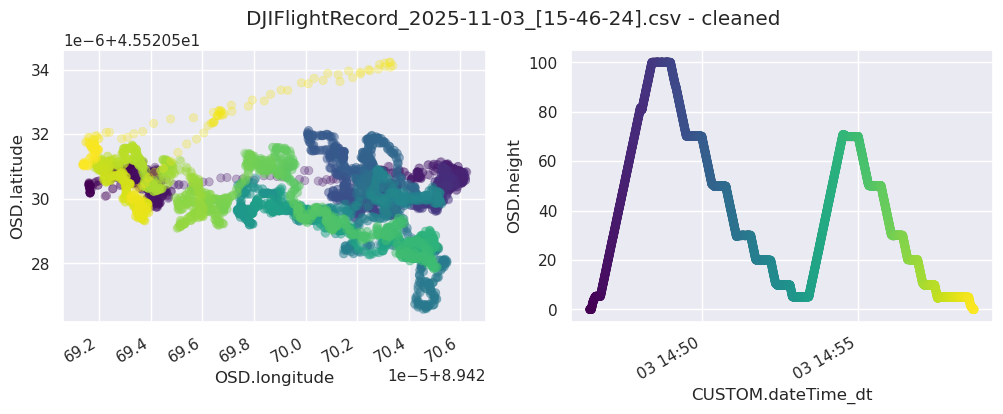

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[11-34-11].csv
Dropping 1 rows with datetime errors.


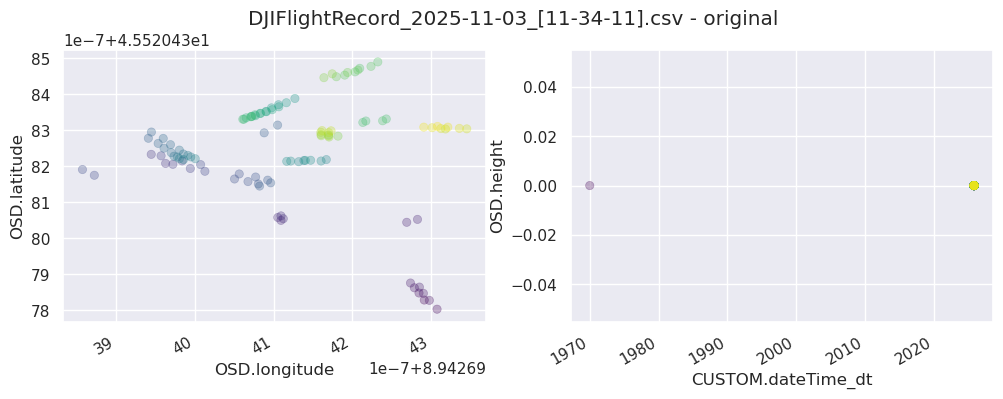

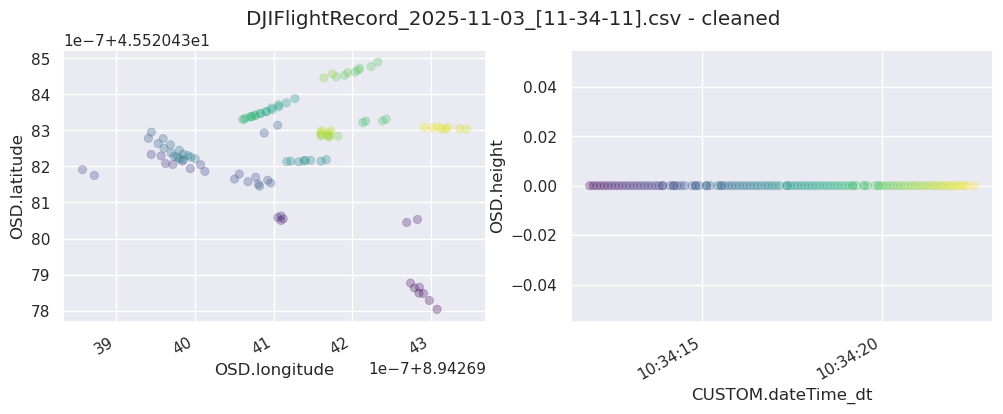

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[11-46-35].csv
Dropping 3 rows with datetime errors.


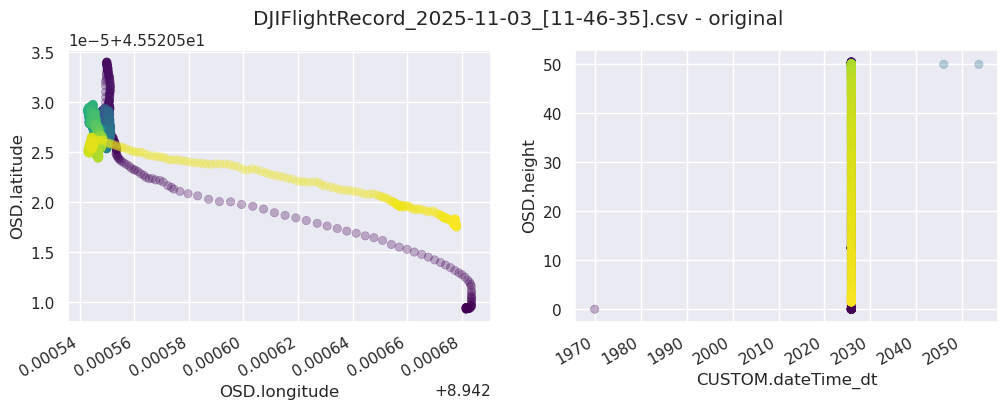

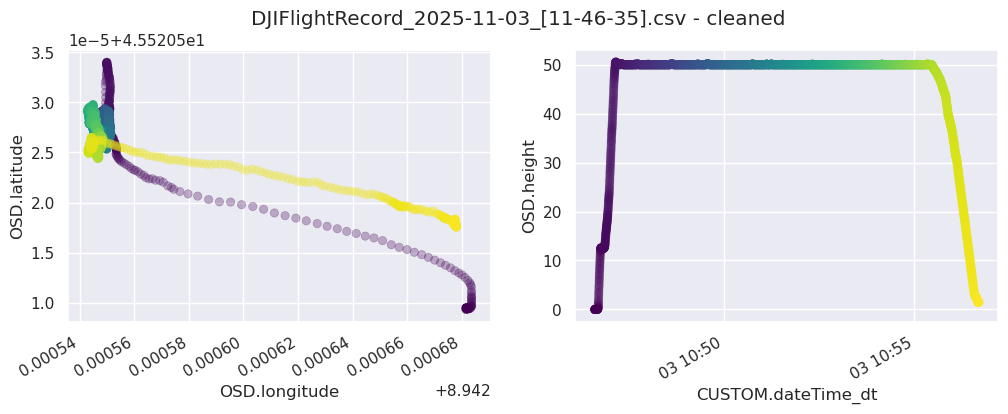

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[11-59-14].csv
Dropping 4 rows with datetime errors.


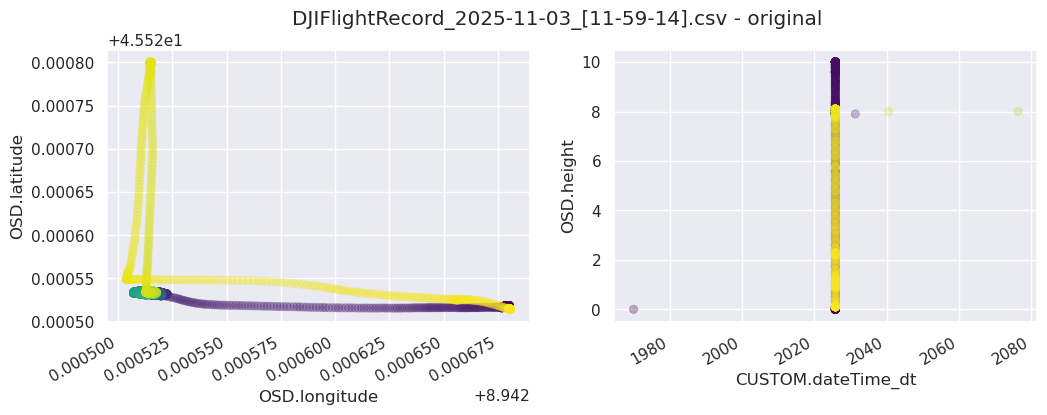

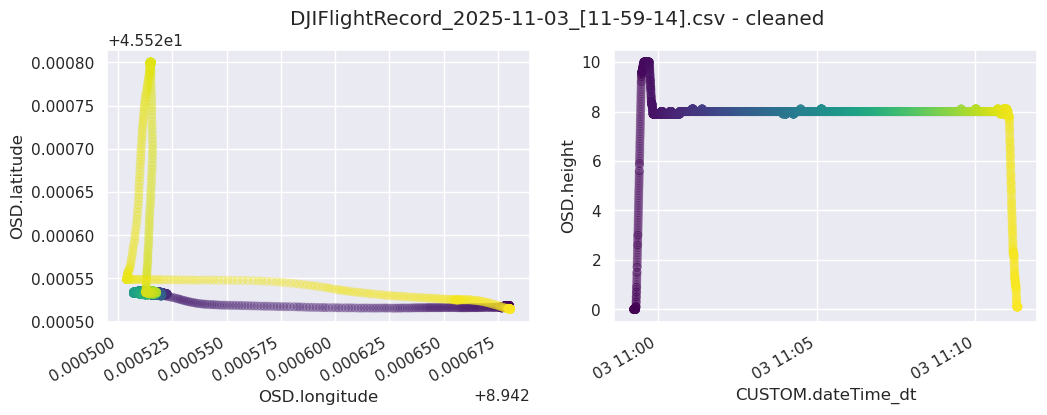

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[15-19-42].csv


/tmp/ipykernel_171690/1439274084.py:7: DtypeWarning: Columns (19,114) have mixed types. Specify dtype option on import or set low_memory=False.
  fr_df = pd.read_csv(os.path.join(folder,filename))


Dropping 3 rows with datetime errors.


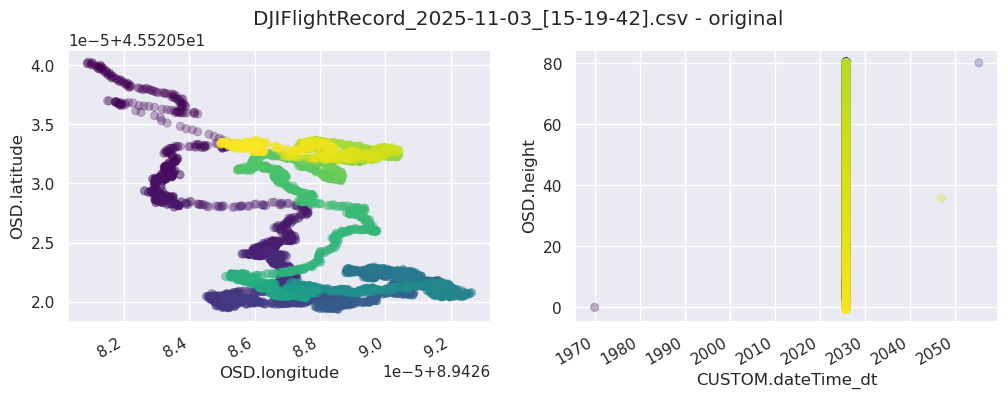

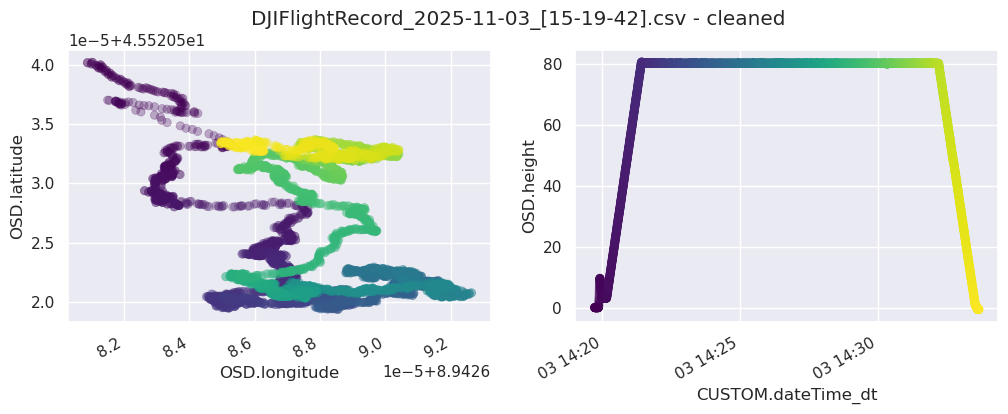

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[14-34-32].csv


/tmp/ipykernel_171690/1439274084.py:7: DtypeWarning: Columns (19,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  fr_df = pd.read_csv(os.path.join(folder,filename))


Dropping 2 rows with datetime errors.


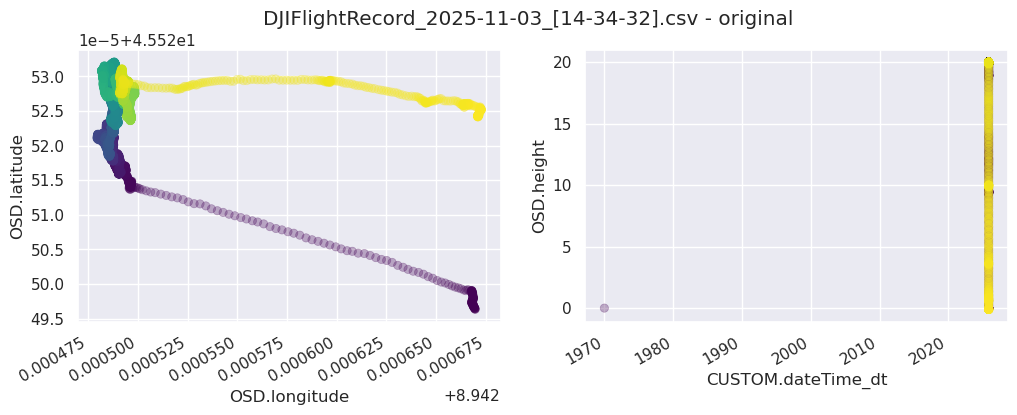

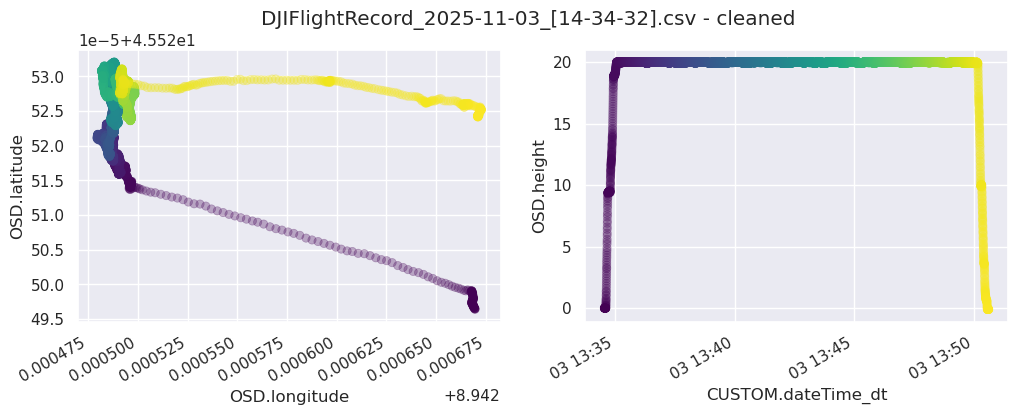

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[15-01-14].csv
Dropping 1 rows with datetime errors.


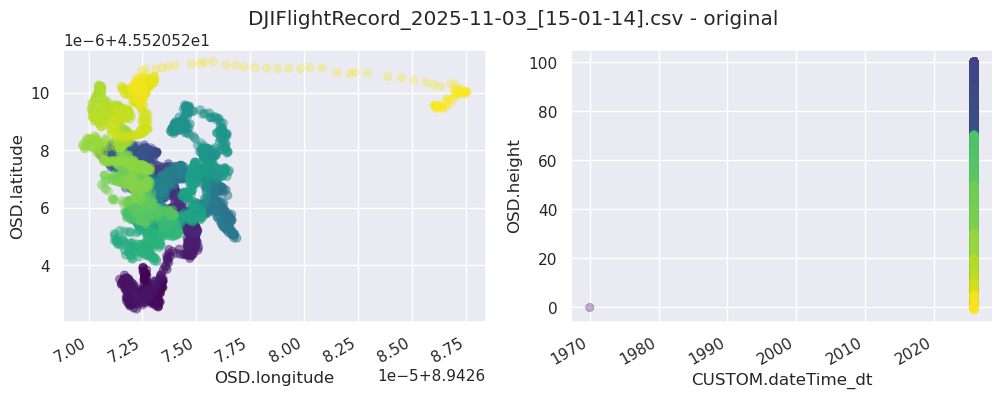

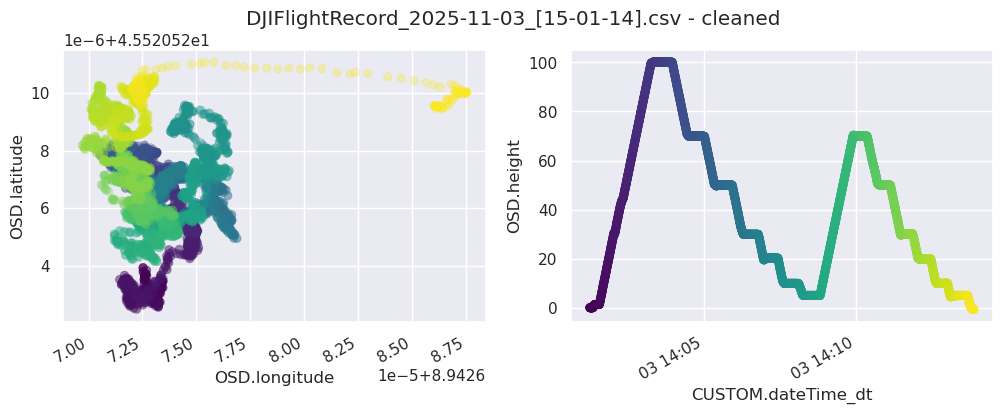

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[16-18-28].csv
Dropping 2 rows with datetime errors.


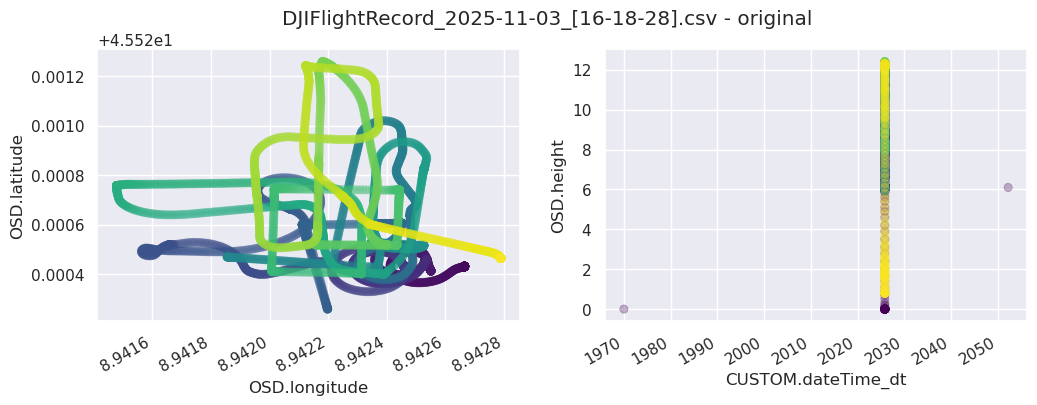

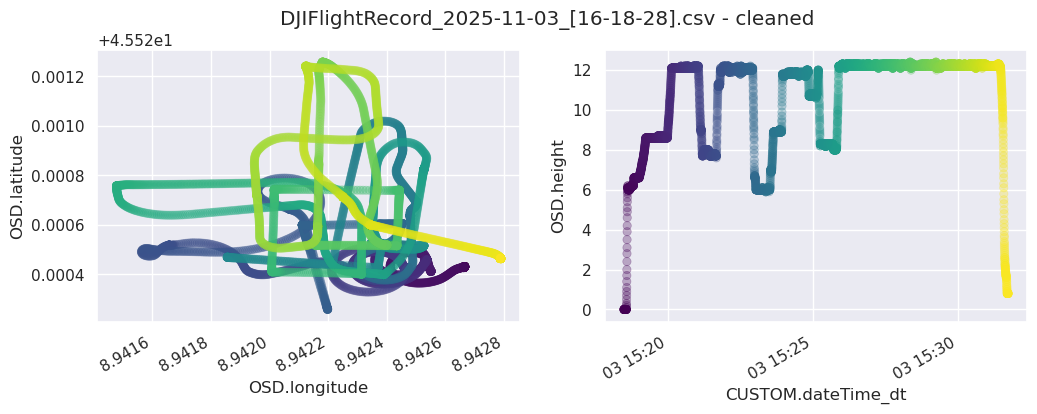

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[16-04-07].csv
Dropping 3 rows with datetime errors.


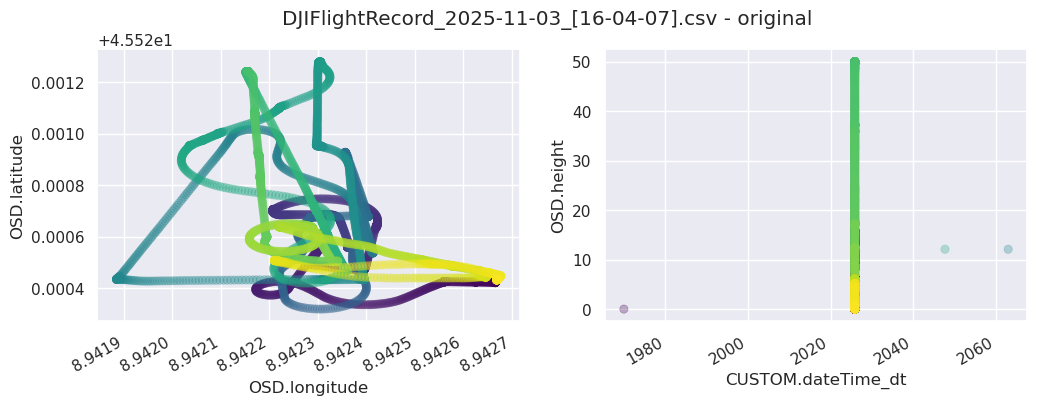

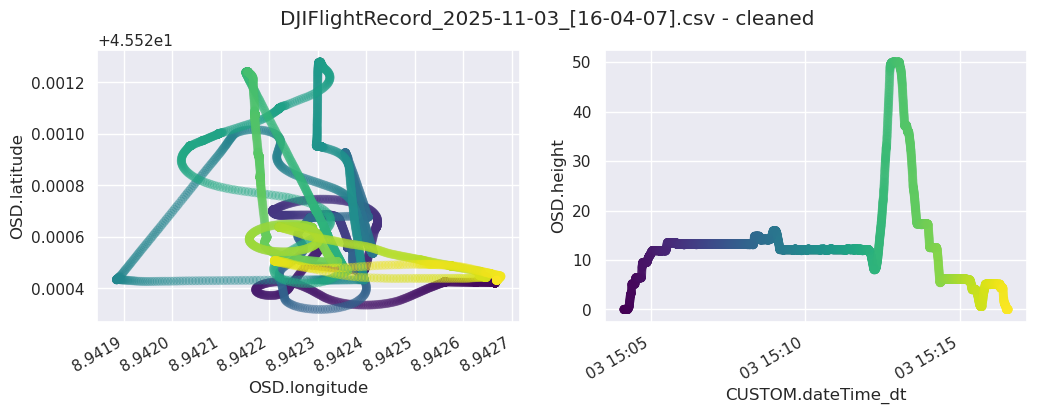

In [33]:
folder = "/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords"
for filename in os.listdir(folder):
    if filename[-3:] != 'csv': continue

    print(f"{folder}/{filename}")

    fr_df = pd.read_csv(os.path.join(folder,filename))

    # Convert to datetime
    fr_df['CUSTOM.dateTime_dt'] = pd.to_datetime(fr_df['CUSTOM.dateTime'], format='ISO8601',utc=True)
    fr_df['CUSTOM.dateTime_dt']


    # Plot trajectory
    fig,axes=plt.subplots(1,2,figsize=(12,4))
    fig.suptitle(f"{filename} - original")
    sns.scatterplot(
            data=fr_df,
            x='OSD.longitude',
            y='OSD.latitude',
            hue='CUSTOM.dateTime_dt',
            legend=False,
            ax=axes[0],
            edgecolor=None,
            alpha=0.3,
            palette='viridis',
        )

    sns.scatterplot(
            data=fr_df,
            x='CUSTOM.dateTime_dt',
            y='OSD.height',
            hue='CUSTOM.dateTime_dt',
            legend=False,
            ax=axes[1],
            edgecolor=None,
            alpha=0.3,
            palette='viridis',
        )

    fig.autofmt_xdate(rotation=30, ha='right')


    # Filter sampling errors.
    median_time = fr_df['CUSTOM.dateTime_dt'].median()
    i_to_drop = fr_df.loc[(fr_df['CUSTOM.dateTime_dt'] > median_time+pd.Timedelta(1,'day')) | (fr_df['CUSTOM.dateTime_dt'] < median_time-pd.Timedelta(1,'day'))].index
    print(f"Dropping {len(i_to_drop)} rows with datetime errors.")
    fr_df.drop(axis=0, index=i_to_drop,inplace=True)


    # Plot trajectory
    fig,axes=plt.subplots(1,2,figsize=(12,4))
    fig.suptitle(f"{filename} - cleaned")

    sns.scatterplot(
            data=fr_df,
            x='OSD.longitude',
            y='OSD.latitude',
            hue='CUSTOM.dateTime_dt',
            legend=False,
            ax=axes[0],
            edgecolor=None,
            alpha=0.3,
            palette='viridis',
        )

    sns.scatterplot(
            data=fr_df,
            x='CUSTOM.dateTime_dt',
            y='OSD.height',
            hue='CUSTOM.dateTime_dt',
            legend=False,
            ax=axes[1],
            edgecolor=None,
            alpha=0.3,
            palette='viridis',    
        )

    fig.autofmt_xdate(rotation=30, ha='right')

    plt.show()
